# Internal Factors Greenhouse - Exploratory Data Analysis

## Objective

Explore 'The Reference' dataset represented by a group of Dutch commercial Tomato growers. 
Observe the behaviour of 6 selected internal conditions of the 'Greenhouse Climate' and calculate the correlation between them. 

## Import Packages and Data

In [58]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from datetime import datetime
import scipy
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/home/proctor/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [19]:
df_ref_greenhouse = pd.read_csv('Reference/GreenhouseClimate.csv')

/tmp/ipykernel_10331/2083090870.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,20,22,23,25,27,29,31,33,35,37,39,41,43,44,45,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ref_greenhouse = pd.read_csv('Reference/GreenhouseClimate.csv')


In [20]:
df_ref_greenhouse['datetime']=pd.to_datetime(df_ref_greenhouse['%time'], unit='D', origin='1899-12-30')
df_ref_greenhouse.head()

,%time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,...,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip,datetime
0,43815.00000,0,35,472,0.4,4.0,100,7.2,0.0,45.2,...,0.0,NaN,25.0,26.0,4.0,NaN,1000,NaN,1.2,2019-12-16 00:00:00.000000000
1,43815.00347,0,85,501,0.5,4.0,100,6.9,0.0,43.6,...,0.0,NaN,25.0,26.0,6.0,NaN,1000,NaN,1.2,2019-12-16 00:04:59.808000256
2,43815.00694,0,96,489,0.5,4.0,100,7.2,0.0,42.3,...,0.0,NaN,25.0,26.0,6.0,NaN,1000,NaN,1.2,2019-12-16 00:09:59.616000000
3,43815.01042,0,96,497,0.5,4.0,100,6.7,0.0,41.2,...,0.0,NaN,25.0,26.0,6.0,NaN,1000,NaN,1.2,2019-12-16 00:15:00.288000000
4,43815.01389,0,96,477,0.5,4.0,100,6.7,0.0,41.2,...,0.0,NaN,25.0,26.0,6.0,NaN,1000,NaN,1.2,2019-12-16 00:20:00.096000256


In [25]:
df_ref_greenhouse['datetime'].describe()

/tmp/ipykernel_10331/370196411.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_ref_greenhouse['datetime'].describe()


count                   47809
unique                  47809
top       2019-12-16 00:00:00
freq                        1
first     2019-12-16 00:00:00
last      2020-05-30 00:00:00
Name: datetime, dtype: object

In [22]:
df_ref_greenhouse_final = df_ref_greenhouse[['datetime','Tair', 'Rhair','CO2air','water_sup','Cum_irr','Tot_PAR']]
df_ref_greenhouse_final.head()

,datetime,Tair,Rhair,CO2air,water_sup,Cum_irr,Tot_PAR
0,2019-12-16 00:00:00.000000000,20.9,60.6,472,4.0,0.4,0
1,2019-12-16 00:04:59.808000256,20.7,61.4,501,6.0,0.5,0
2,2019-12-16 00:09:59.616000000,21.2,60.9,489,6.0,0.5,0
3,2019-12-16 00:15:00.288000000,20.7,62.5,497,6.0,0.5,0
4,2019-12-16 00:20:00.096000256,20.7,62.7,477,6.0,0.5,0


In [28]:
df_ref_greenhouse_final.columns

Index(['datetime', 'Tair', 'Rhair', 'CO2air', 'water_sup', 'Cum_irr',
       'Tot_PAR'],
      dtype='object')

In [36]:
#Convert columns to Float
cols = ['Tair', 'Rhair', 'CO2air', 'water_sup', 'Cum_irr','Tot_PAR']
df_ref_greenhouse_final[cols] = df_ref_greenhouse_final[cols].apply(pd.to_numeric, errors='coerce', axis=1)

/tmp/ipykernel_10331/1211084275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref_greenhouse_final[cols] = df_ref_greenhouse_final[cols].apply(pd.to_numeric, errors='coerce', axis=1)


In [77]:
df_ref_greenhouse_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   47809 non-null  datetime64[ns]
 1   Tair       47738 non-null  float64       
 2   Rhair      47809 non-null  float64       
 3   CO2air     47738 non-null  float64       
 4   water_sup  47738 non-null  float64       
 5   Cum_irr    47738 non-null  float64       
 6   Tot_PAR    47738 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.6 MB


## Internal Conditions

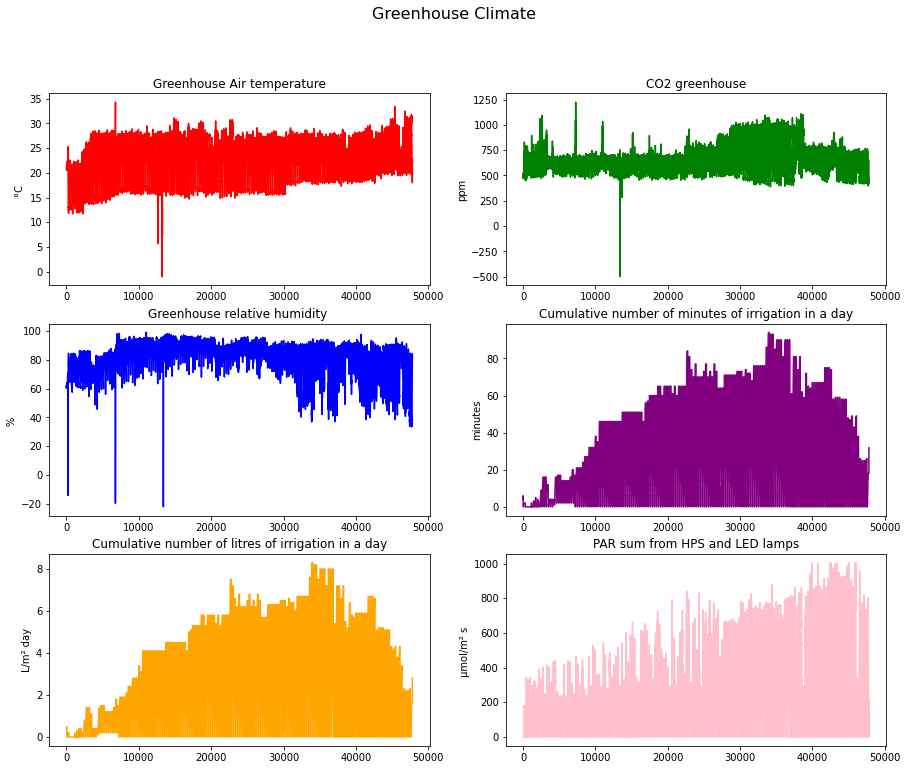

In [215]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


fig, ax = plt.subplots(3, 2)
fig.set_size_inches(15, 12)
fig.suptitle('Greenhouse Climate', fontsize=16)
ax[0, 0].plot(df_ref_greenhouse_final['Tair'], 'red')
ax[0,0].set_title('Greenhouse Air temperature')
ax[0,0].set_ylabel('°C ')

ax[1, 0].plot(df_ref_greenhouse_final['Rhair'], 'blue') 
ax[1,0].set_title('Greenhouse relative humidity ')
ax[1,0].set_ylabel('% ')

ax[0, 1].plot(df_ref_greenhouse_final['CO2air'], 'green')
ax[0,1].set_title('CO2 greenhouse')
ax[0,1].set_ylabel('ppm')

ax[1, 1].plot(df_ref_greenhouse_final['water_sup'], 'purple') 
ax[1,1].set_title('Cumulative number of minutes of irrigation in a day')
ax[1,1].set_ylabel('minutes')
ax[2, 0].plot(df_ref_greenhouse_final['Cum_irr'], 'orange') 
ax[2,0].set_title('Cumulative number of litres of irrigation in a day')
ax[2,0].set_ylabel('L/m² day')
ax[2, 1].plot(df_ref_greenhouse_final['Tot_PAR'], 'pink') 
ax[2,1].set_title('PAR sum from HPS and LED lamps')
ax[2,1].set_ylabel('µmol/m² s ')

plt.show()

## Correlation between variables

/tmp/ipykernel_10331/3276346126.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df_ref_greenhouse_final.corr(), cmap="YlGnBu", annot=True)


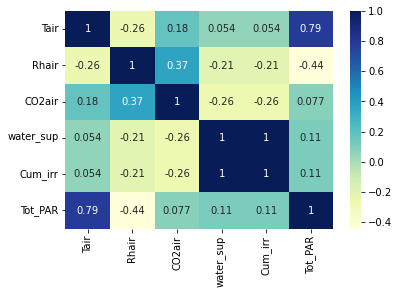

In [206]:
dataplot = sns.heatmap(df_ref_greenhouse_final.corr(), cmap="YlGnBu", annot=True)


## Stationarity - ADF Test

In [155]:
df_ref_greenhouse_final['Tair'].describe()

count    47738.000000
mean        22.713505
std          3.920410
min         -1.000000
25%         20.000000
50%         22.800000
75%         26.400000
max         34.300000
Name: Tair, dtype: float64

In [156]:
#Check Nan
df_ref_greenhouse_final.Rhair.isna().sum()
#Replace Nan with Mean 
rhair_mean = df_ref_greenhouse_final['Rhair'].mean()
df_ref_greenhouse_final['Rhair'] = df_ref_greenhouse_final['Rhair'].fillna(rhair_mean)

/tmp/ipykernel_10331/3037071832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref_greenhouse_final['Rhair'] = df_ref_greenhouse_final['Rhair'].fillna(rhair_mean)


In [193]:
#Check for Nan
df_ref_greenhouse_final.Cum_irr.isna().sum()


0

In [163]:
#Replace Nans with Mean 
Tair_mean = df_ref_greenhouse_final['Tair'].mean()
df_ref_greenhouse_final['Tair'] = df_ref_greenhouse_final['Tair'].fillna(Tair_mean)

rhair_mean = df_ref_greenhouse_final['Rhair'].mean()
df_ref_greenhouse_final['Rhair'] = df_ref_greenhouse_final['Rhair'].fillna(rhair_mean)

CO2air_mean = df_ref_greenhouse_final['CO2air'].mean()
df_ref_greenhouse_final['CO2air'] = df_ref_greenhouse_final['CO2air'].fillna(CO2air_mean)

water_sup_mean = df_ref_greenhouse_final['water_sup'].mean()
df_ref_greenhouse_final['water_sup'] = df_ref_greenhouse_final['water_sup'].fillna(water_sup_mean)

Cum_irr_mean = df_ref_greenhouse_final['Cum_irr'].mean()
df_ref_greenhouse_final['Cum_irr'] = df_ref_greenhouse_final['Cum_irr'].fillna(Cum_irr_mean)

Tot_PAR_mean = df_ref_greenhouse_final['Tot_PAR'].mean()
df_ref_greenhouse_final['Tot_PAR'] = df_ref_greenhouse_final['Tot_PAR'].fillna(Tot_PAR_mean)


/tmp/ipykernel_10331/2265043098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref_greenhouse_final['Tair'] = df_ref_greenhouse_final['Tair'].fillna(Tair_mean)
/tmp/ipykernel_10331/2265043098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref_greenhouse_final['Rhair'] = df_ref_greenhouse_final['Rhair'].fillna(rhair_mean)
/tmp/ipykernel_10331/2265043098.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

ADF tests the following null hypothesis:

H
0
 : The series is not-stationary
 
 A p-value close to 0 (e.g. p < 0.05) indicates stationarity



In [63]:
df_ref_greenhouse_final['Rhair'].describe()

count    47738.000000
mean        81.756069
std         11.619726
min        -22.200000
25%         78.700000
50%         85.300000
75%         89.200000
max         99.200000
Name: Rhair, dtype: float64

In [185]:
from statsmodels.tsa.stattools import adfuller

print(adfuller(df_ref_greenhouse_final['Tair'])[1])
print('Tair is Stationary')

0.0
Tair is Stationary


Now we are ready to run ADF Test on our variables. Our Null Hypothesis H0 is Not Stationary. 

In [210]:
result = adfuller(df_ref_greenhouse_final['Tair'].values, autolag='AIC')
result[1]


0.0

In [169]:
print(adfuller(df_ref_greenhouse_final.Rhair)[1])
print('Rhair is Stationary')

3.541387554137435e-29
Rhair is Stationary


In [171]:
print(adfuller(df_ref_greenhouse_final.CO2air)[1])
print('CO2air is Stationary')

0.0
CO2air is Stationary


In [173]:
print(adfuller(df_ref_greenhouse_final.water_sup)[1])
print('Water_sup is Stationary')

0.0
Water_sup is Stationary


In [ ]:
print(adfuller(df_ref_greenhouse_final.CO2air))
print('CO2air is Stationary')[1]


In [181]:
print(adfuller(df_ref_greenhouse_final.Cum_irr)[1])
print('Cum_irr is Stationary')

0.0
Cum_irr is Stationary


In [182]:
print(adfuller(df_ref_greenhouse_final.Tot_PAR)[1])
print('Tot_PAR is Stationary')

0.0
Tot_PAR is Stationary


/tmp/ipykernel_10331/3276346126.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df_ref_greenhouse_final.corr(), cmap="YlGnBu", annot=True)


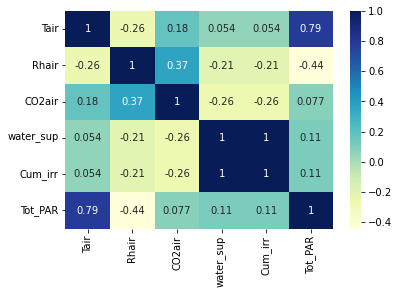

In [211]:
df_ref_greenhouse_final.columns

Index(['datetime', 'Tair', 'Rhair', 'CO2air', 'water_sup', 'Cum_irr',
       'Tot_PAR'],
      dtype='object')

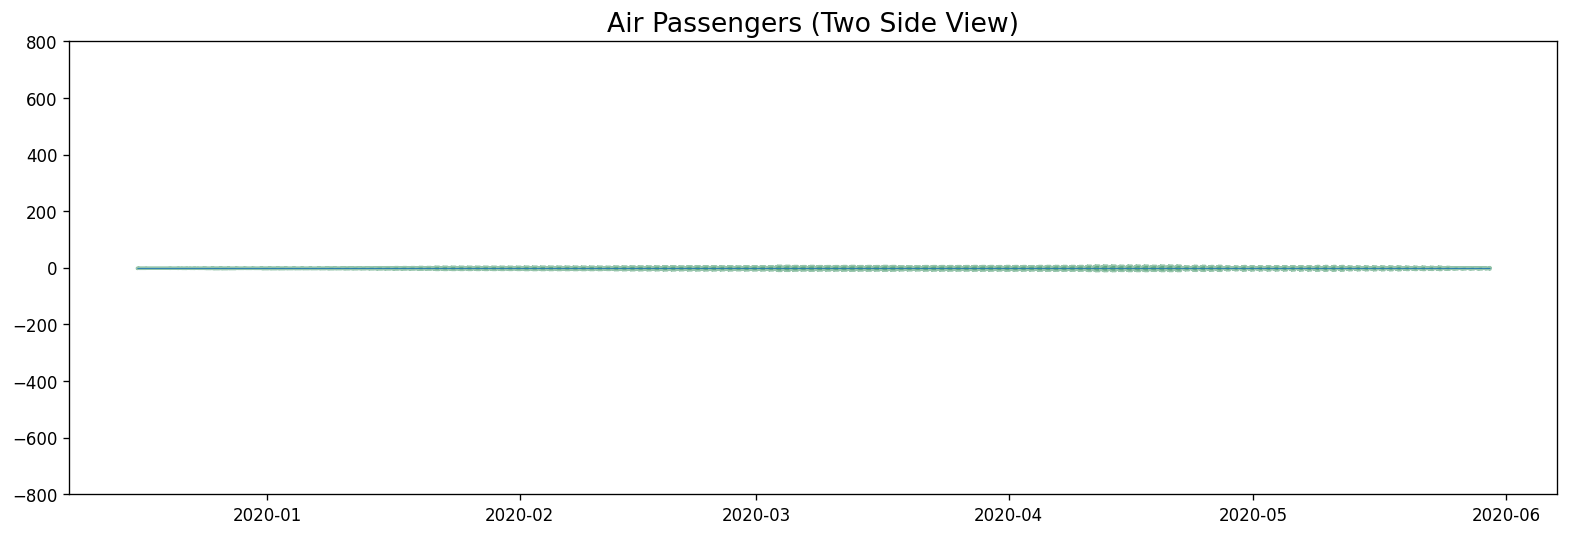

In [216]:
x = df_ref_greenhouse_final['datetime'].values
y1 = df_ref_greenhouse_final['Cum_irr'].values
# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df_ref_greenhouse_final['datetime']), xmax=np.max(df_ref_greenhouse_final['datetime']), linewidth=.5)
plt.show()

In [200]:
df_ref_greenhouse_final['Cum_irr'].isin([0]).sum()

    

6469

In [198]:
adf_ref_greenhouse_final['Cum_irr']



0        0.400000
1        0.500000
2        0.500000
3        0.500000
4        0.500000
           ...   
47804    1.600000
47805    1.600000
47806    1.600000
47807    1.600000
47808    2.820851
Name: Cum_irr, Length: 47809, dtype: float64

In [203]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Additive Decomposition
result_add = seasonal_decompose(df_ref_greenhouse_final['Cum_irr'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

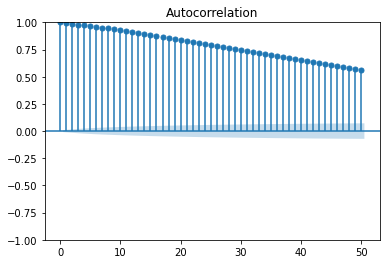

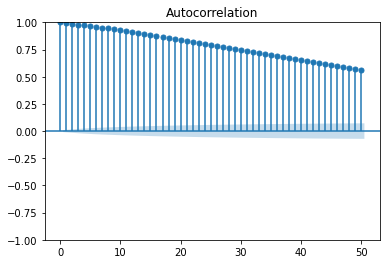

In [73]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_ref_greenhouse_final.Rhair, lags=50)


/home/proctor/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


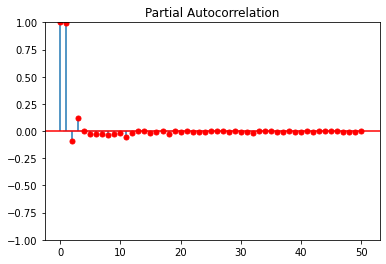

In [74]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_ref_greenhouse_final.Rhair, lags=50, c='r');

In [70]:
print('additive resid: ', adfuller(result_add.resid.dropna())[1])
print('multiplicative resid: ', adfuller(result_mul.resid.dropna())[1])

NameError: name 'result_add' is not defined

<AxesSubplot:>

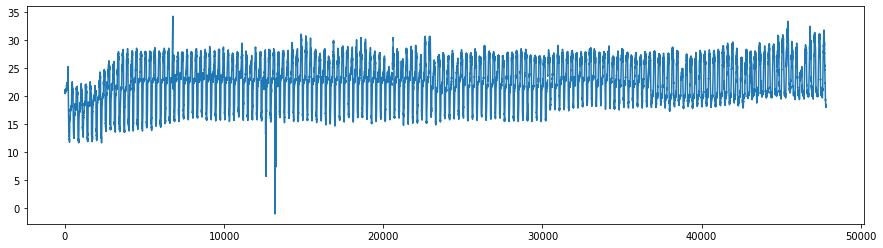

In [46]:
df_ref_greenhouse_final['Tair'].plot(figsize=(15,4))

In [9]:
df_ref_greenhouse = df_ref_greenhouse.sort_values(by='%time',ascending=True)
df_ref_greenhouse.head()

,%time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,...,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip,datetime
0,43815.00000,0,35,472,0.4,4.0,100,7.2,0.0,45.2,...,0.0,NaN,25.0,26.0,4.0,NaN,1000,NaN,1.2,2019-12-16 00:00:00.000000000
1,43815.00347,0,85,501,0.5,4.0,100,6.9,0.0,43.6,...,0.0,NaN,25.0,26.0,6.0,NaN,1000,NaN,1.2,2019-12-16 00:04:59.808000256
2,43815.00694,0,96,489,0.5,4.0,100,7.2,0.0,42.3,...,0.0,NaN,25.0,26.0,6.0,NaN,1000,NaN,1.2,2019-12-16 00:09:59.616000000
3,43815.01042,0,96,497,0.5,4.0,100,6.7,0.0,41.2,...,0.0,NaN,25.0,26.0,6.0,NaN,1000,NaN,1.2,2019-12-16 00:15:00.288000000
4,43815.01389,0,96,477,0.5,4.0,100,6.7,0.0,41.2,...,0.0,NaN,25.0,26.0,6.0,NaN,1000,NaN,1.2,2019-12-16 00:20:00.096000256


In [ ]:
df_ref_greenhouse[] 

In [46]:
df_ref_greenhouse.to_csv('reference_greenshouse.csv')

In [14]:
df_ref_production = pd.read_csv('Reference/Reference/Production.csv')


,%time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,43510,0.32,0.0000,NaN,45,NaN,717.0,0,0
1,43880,0.32,0.0022,1.0,45,NaN,964.0,0,0
2,43885,0.72,0.0000,0.6,47,82.0,655.0,0,0
3,43889,0.40,0.0000,1.2,48,199.0,1468.0,0,0
4,43894,0.34,0.0000,0.3,49,45.0,361.0,0,0


In [16]:
df_ref_production['datetime'] = pd.to_datetime(df_ref_production['%time'], unit='D', origin='1899-12-30')

In [17]:
df_ref_production.head()

,%time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB,datetime
0,43510,0.32,0.0000,NaN,45,NaN,717.0,0,0,2019-02-14
1,43880,0.32,0.0022,1.0,45,NaN,964.0,0,0,2020-02-19
2,43885,0.72,0.0000,0.6,47,82.0,655.0,0,0,2020-02-24
3,43889,0.40,0.0000,1.2,48,199.0,1468.0,0,0,2020-02-28
4,43894,0.34,0.0000,0.3,49,45.0,361.0,0,0,2020-03-04


In [48]:
df_ref_production.to_csv('reference_production.csv')

In [15]:
df_ref_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   %time                     24 non-null     int64  
 1   ProdA                     24 non-null     float64
 2   ProdB                     24 non-null     float64
 3   avg_nr_harvested_trusses  23 non-null     float64
 4   Truss development time    24 non-null     int64  
 5   Nr_fruits_ClassA          22 non-null     float64
 6   Weight_fruits_ClassA      24 non-null     float64
 7   Nr_fruits_ClassB          24 non-null     int64  
 8   Weight_fruits_ClassB      24 non-null     int64  
dtypes: float64(5), int64(4)
memory usage: 1.8 KB


In [26]:
df_ref_production['datetime'].describe()


/tmp/ipykernel_24027/1984336414.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_ref_production['datetime'].describe()


count                      24
unique                     24
top       2019-02-14 00:00:00
freq                        1
first     2019-02-14 00:00:00
last      2020-05-29 00:00:00
Name: datetime, dtype: object

In [41]:
df_greenhouse_ref_original = pd.read_csv('GreenhouseClimate_original.csv')
df_greenhouse_ref_original

/tmp/ipykernel_24027/3761246920.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,20,22,23,25,27,29,31,33,35,37,39,41,43,44,45,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_greenhouse_ref_original = pd.read_csv('GreenhouseClimate_original.csv')


,%time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,...,t_rail_min_sp,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip
0,43815.00000,0,35,472,0.4,4.0,100,7.2,0.0,45.2,...,NaN,0.0,NaN,25.0,26.0,4.0,NaN,1000,NaN,1.2
1,43815.00347,0,85,501,0.5,4.0,100,6.9,0.0,43.6,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000,NaN,1.2
2,43815.00694,0,96,489,0.5,4.0,100,7.2,0.0,42.3,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000,NaN,1.2
3,43815.01042,0,96,497,0.5,4.0,100,6.7,0.0,41.2,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000,NaN,1.2
4,43815.01389,0,96,477,0.5,4.0,100,6.7,0.0,41.2,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000,NaN,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47804,43980.98611,0,0,461,1.6,10.4,0,2.7,0.0,0.0,...,0.0,0.0,18.0,18.0,20.0,18.0,NaN,30,0.0,0.0
47805,43980.98958,0,0,466,1.6,10.3,0,2.5,0.0,0.0,...,0.0,0.0,18.0,18.0,20.0,18.0,NaN,30,0.0,0.0
47806,43980.99306,0,0,474,1.6,10.3,5,2.5,0.0,0.0,...,0.0,0.0,18.0,18.0,20.0,18.0,NaN,30,0.0,0.0
47807,43980.99653,0,0,476,1.6,10.3,5,2.4,0.0,0.0,...,0.0,0.0,18.0,18.0,20.0,18.0,NaN,30,0.0,0.0


In [44]:
df_greenhouse_ref_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   %time                        47809 non-null  float64
 1   AssimLight                   47809 non-null  object 
 2   BlackScr                     47809 non-null  object 
 3   CO2air                       47809 non-null  object 
 4   Cum_irr                      47809 non-null  object 
 5   EC_drain_PC                  47809 non-null  object 
 6   EnScr                        47809 non-null  object 
 7   HumDef                       47809 non-null  object 
 8   PipeGrow                     47809 non-null  object 
 9   PipeLow                      47809 non-null  object 
 10  Rhair                        47809 non-null  object 
 11  Tair                         47809 non-null  object 
 12  Tot_PAR                      47809 non-null  object 
 13  Tot_PAR_Lamps   